<a href="https://colab.research.google.com/github/sames12421/DOG_VS_CAT_CNN-RELATED-MODEL/blob/main/dog_vs_cat_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the dataset
dataset = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=False
)

# Split the dataset into train and test
train_dataset = dataset[0]
test_dataset = dataset[1]

# Alternatively, you can iterate through the dataset to get images and labels:
# for image, label in train_dataset:
#     # Process image and label here
#     print(image.shape, label)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.YT9X7T_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 55s 79ms/step - accuracy: 0.5685 - loss: 0.7227 - val_accuracy: 0.7167 - val_loss: 0.5430
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 73s 74ms/step - accuracy: 0.7302 - loss: 0.5426 - val_accuracy: 0.7719 - val_loss: 0.4777
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 78s 68ms/step - accuracy: 0.7978 - loss: 0.4348 - val_accuracy: 0.8005 - val_loss: 0.4279
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 43s 73ms/step - accuracy: 0.8473 - loss: 0.3543 - val_accuracy: 0.8003 - val_loss: 0.4513
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 38s 66ms/step - accuracy: 0.8945 - loss: 0.2482 - val_accuracy: 0.7814 - val_loss: 0.5493
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9337 - loss: 0.1688 - val_accuracy: 0.7814 - val_loss: 0.6834
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9598 - loss: 0.1132 - val_accuracy: 0.7784 - val_loss: 1.0850
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 43s 73ms/step - accuracy: 0.9755 - loss: 0.0742 - 

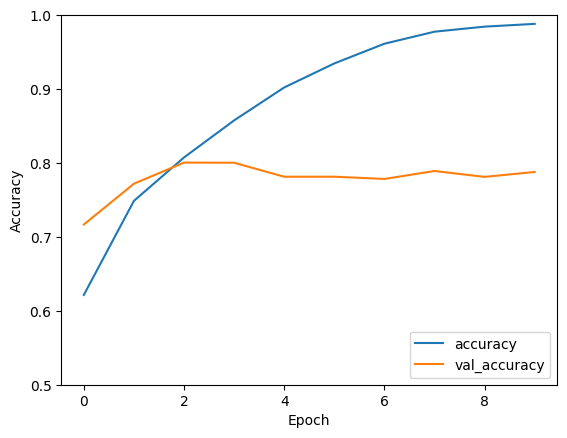

In [ ]:
import matplotlib.pyplot as plt

# Preprocessing the data
def preprocess(image, label):
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)
  image = tf.image.resize(image, size=(150, 150))
  return image, label

train_dataset = train_dataset.map(preprocess).batch(32)
test_dataset = test_dataset.map(preprocess).batch(32)

# Build the model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()